In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/consumer-electronics-sales-dataset/consumer_electronics_sales_data.csv


# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/consumer-electronics-sales-dataset/consumer_electronics_sales_data.csv')

In [4]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [5]:
df.tail()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1
8999,14873,Smartphones,Sony,2315.583087,62,0,15,2,1


In [6]:
df.columns

Index(['ProductID', 'ProductCategory', 'ProductBrand', 'ProductPrice',
       'CustomerAge', 'CustomerGender', 'PurchaseFrequency',
       'CustomerSatisfaction', 'PurchaseIntent'],
      dtype='object')

In [7]:
df.describe()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,10373.500000,1527.429195,43.347000,0.508889,10.054667,2.996000,0.566444
std,2598.220545,829.900898,15.055084,0.499949,5.461328,1.405301,0.495593
min,5874.000000,100.376358,18.000000,0.000000,1.000000,1.000000,0.000000
25%,8123.750000,809.165014,30.000000,0.000000,5.000000,2.000000,0.000000
50%,10373.500000,1513.024577,43.000000,1.000000,10.000000,3.000000,1.000000
75%,12623.250000,2244.415520,56.000000,1.000000,15.000000,4.000000,1.000000
max,14873.000000,2999.852253,69.000000,1.000000,19.000000,5.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [9]:
df.shape

(9000, 9)

In [10]:
df.isnull()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8995,False,False,False,False,False,False,False,False,False
8996,False,False,False,False,False,False,False,False,False
8997,False,False,False,False,False,False,False,False,False
8998,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [12]:
df[df.duplicated()]

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent


In [13]:
df.duplicated().sum()

0

In [14]:
print("\nDistribution of Categorical Features:")
print(df['ProductCategory'].value_counts())
print(df['ProductBrand'].value_counts())
print(df['CustomerGender'].value_counts())
print("\n0 - Male , \n1 - Female")



Distribution of Categorical Features:
ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64
ProductBrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64
CustomerGender
1    4580
0    4420
Name: count, dtype: int64

0 - Male , 
1 - Female


In [15]:
age_stats = df.groupby('ProductCategory')['CustomerAge'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print("Summary Statistics of Customer Age by Product Category:")
age_stats

Summary Statistics of Customer Age by Product Category:


,ProductCategory,mean,median,std,min,max
0,Headphones,43.210012,43.0,15.180517,18,69
1,Laptops,42.621607,42.0,14.887141,18,69
2,Smart Watches,44.046409,45.0,14.918168,18,69
3,Smartphones,43.334601,43.0,15.125775,18,69
4,Tablets,43.534200,44.0,15.151053,18,69


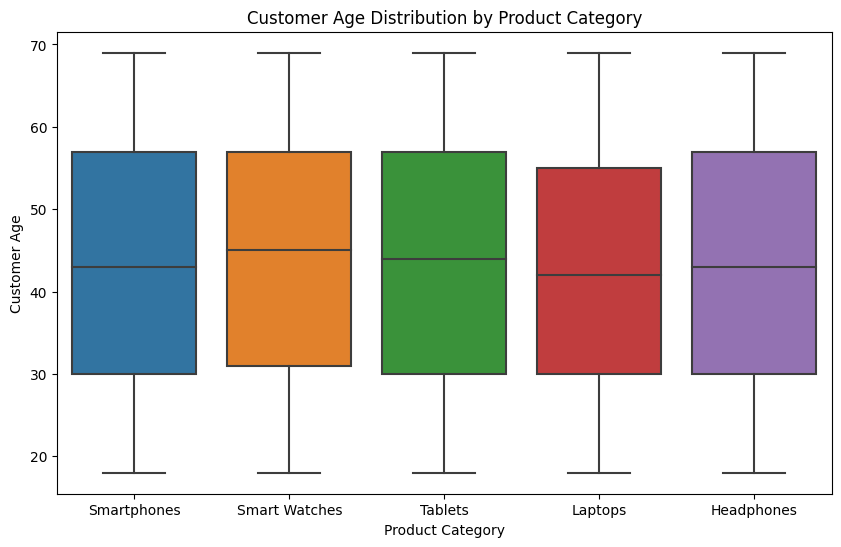

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductCategory', y='CustomerAge', data=df)
plt.title('Customer Age Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Customer Age')
plt.show()

In [17]:
bins = [0, 25, 35, 45, 55, 65, 75, 85, 95]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']


df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)
age_product_crosstab = pd.crosstab(df['AgeGroup'], df['ProductCategory'])

print("Counts of Age Groups by Product Category:")
print(age_product_crosstab)

Counts of Age Groups by Product Category:
ProductCategory  Headphones  Laptops  Smart Watches  Smartphones  Tablets
AgeGroup                                                                 
0-25                    261      278            238          244      247
26-35                   330      360            334          372      336
36-45                   321      369            318          357      334
46-55                   316      347            379          334      337
56-65                   355      343            372          343      333
66-75                   155      145            169          191      182


In [18]:
# Cross-tabulate ProductCategory and ProductBrand
category_brand_crosstab = pd.crosstab(df['ProductCategory'], df['ProductBrand'])

print("Counts of Product Brands by Product Category:")
print(category_brand_crosstab)

Counts of Product Brands by Product Category:
ProductBrand     Apple   HP  Other Brands  Samsung  Sony
ProductCategory                                         
Headphones         346  348           359      341   344
Laptops            359  381           363      391   348
Smart Watches      340  365           356      379   370
Smartphones        343  372           362      387   377
Tablets            372  354           336      356   351


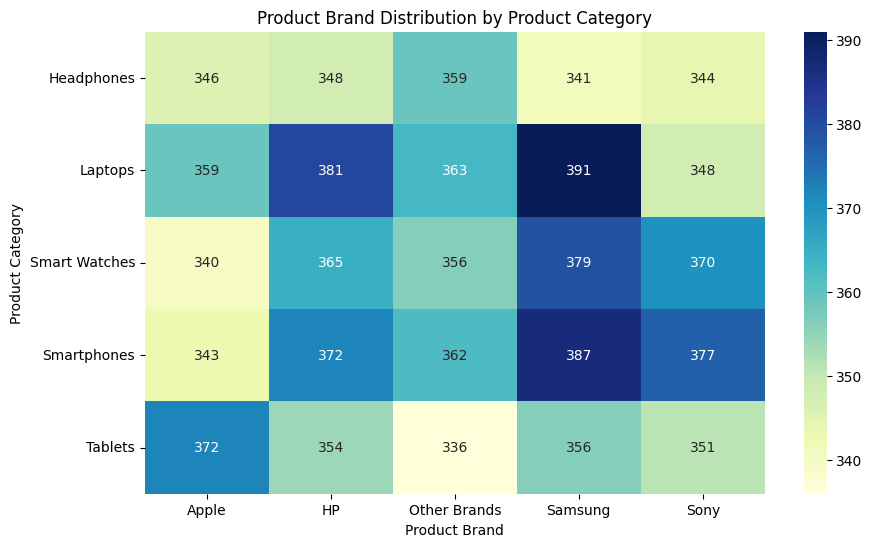

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(category_brand_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Product Brand Distribution by Product Category')
plt.xlabel('Product Brand')
plt.ylabel('Product Category')
plt.show()

In [20]:
price_stats = df.groupby('ProductBrand')['ProductPrice'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print("Summary Statistics of Product Price by Product Brand:")
print(price_stats)

Summary Statistics of Product Price by Product Brand:
   ProductBrand         mean       median         std         min          max
0         Apple  1502.500348  1461.062918  833.045171  100.774858  2999.520562
1            HP  1539.973206  1514.053862  829.353540  103.876278  2999.456163
2  Other Brands  1499.356942  1452.813907  830.785475  100.376358  2991.995071
3       Samsung  1568.324868  1575.912954  824.889121  104.127000  2998.316764
4          Sony  1524.680821  1547.128504  830.599699  102.134232  2999.852253


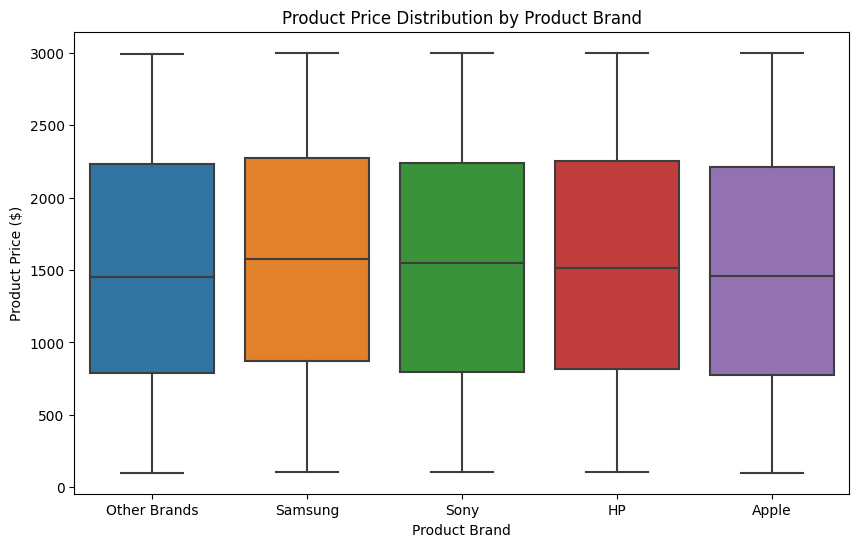

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductBrand', y='ProductPrice', data=df)
plt.title('Product Price Distribution by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Product Price ($)')
plt.show()

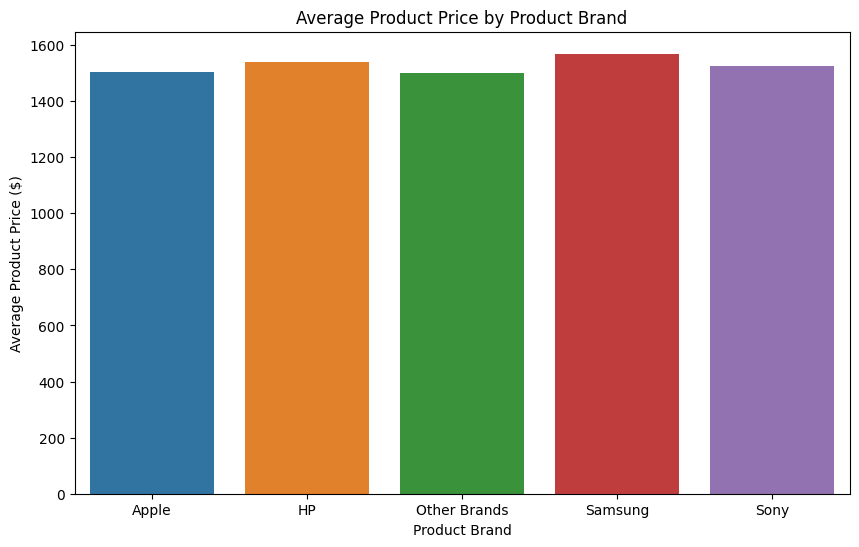

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductBrand', y='mean', data=price_stats)
plt.title('Average Product Price by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Average Product Price ($)')
plt.show()

In [23]:
category_counts = df['ProductCategory'].value_counts()
category_counts

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64

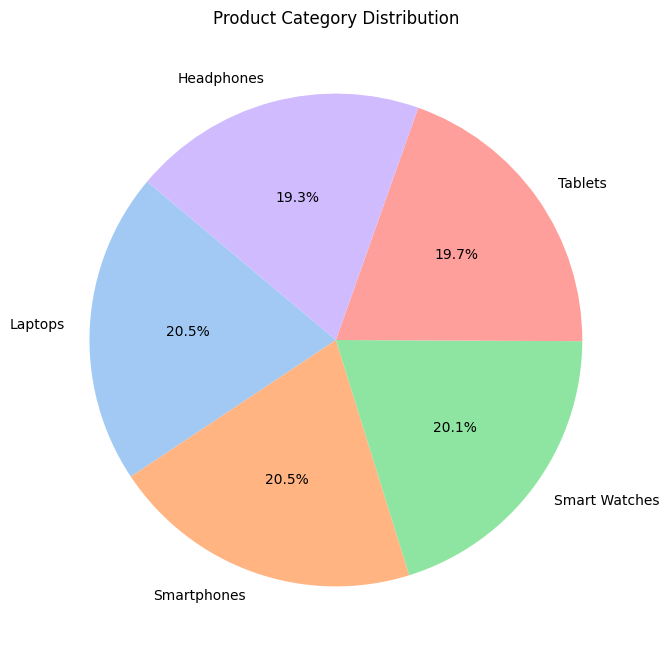

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Product Category Distribution')
plt.show()

In [25]:
brand_counts = df['ProductBrand'].value_counts()
brand_counts

ProductBrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64

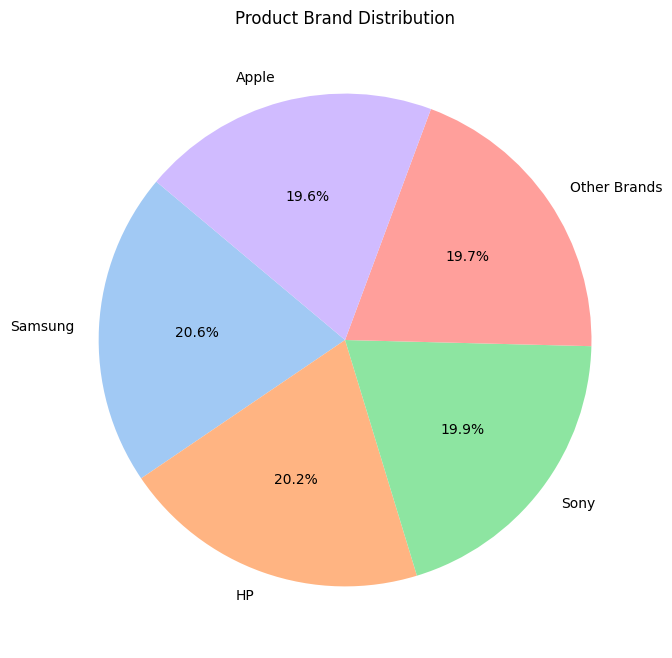

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Product Brand Distribution')
plt.show()

In [27]:
#Customer satisfaction rating (1 - 5).
satisfaction_brand_crosstab = pd.crosstab(df['CustomerSatisfaction'], df['ProductBrand'])

print("Counts of Customer Satisfaction by Product Brand:")
satisfaction_brand_crosstab


Counts of Customer Satisfaction by Product Brand:


ProductBrand,Apple,HP,Other Brands,Samsung,Sony
CustomerSatisfaction,,,,,
1,331,369,338,378,359
2,333,358,366,377,380
3,355,373,373,397,350
4,385,378,330,340,365
5,356,342,369,362,336


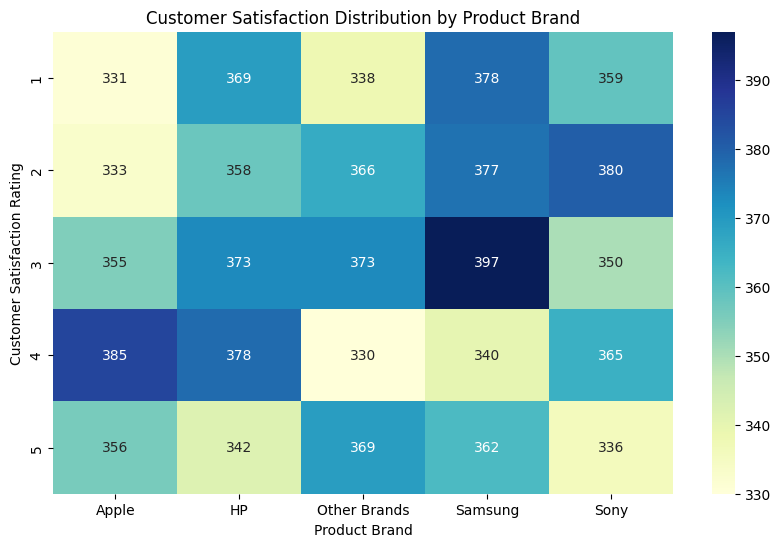

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(satisfaction_brand_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Satisfaction Distribution by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Customer Satisfaction Rating')
plt.show()

In [29]:
#Customer satisfaction rating (1 - 5).
satisfaction_stats = df.groupby('ProductBrand')['CustomerSatisfaction'].agg(['mean', 'median', 'std', 'count']).reset_index()
print("Summary Statistics of Customer Satisfaction by Product Brand:")
satisfaction_stats


Summary Statistics of Customer Satisfaction by Product Brand:


,ProductBrand,mean,median,std,count
0,Apple,3.057955,3.0,1.402525,1760
1,HP,2.981319,3.0,1.402771,1820
2,Other Brands,3.014640,3.0,1.408949,1776
3,Samsung,2.962783,3.0,1.408177,1854
4,Sony,2.965922,3.0,1.403286,1790


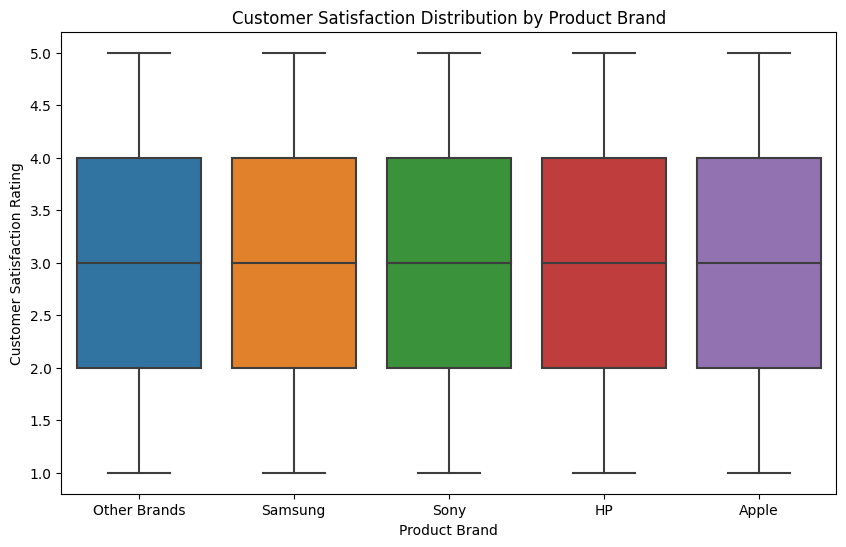

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductBrand', y='CustomerSatisfaction', data=df)
plt.title('Customer Satisfaction Distribution by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Customer Satisfaction Rating')
plt.show()

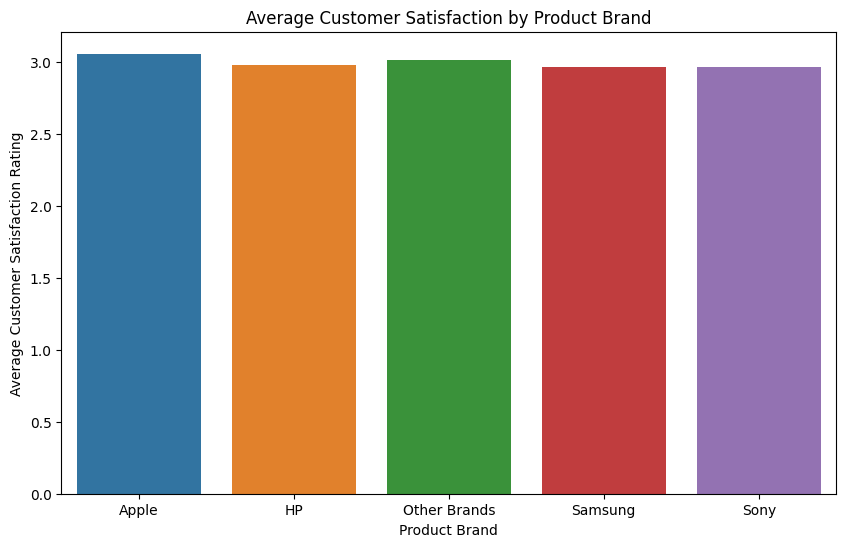

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductBrand', y='mean', data=satisfaction_stats)
plt.title('Average Customer Satisfaction by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Average Customer Satisfaction Rating')
plt.show()

In [32]:
age_stats = df.groupby('ProductBrand')['CustomerAge'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
print("Summary Statistics of Customer Age by Product Brand:")
age_stats


Summary Statistics of Customer Age by Product Brand:


,ProductBrand,mean,median,std,min,max
0,Apple,43.409659,43.0,15.073736,18,69
1,HP,43.374176,43.0,15.057672,18,69
2,Other Brands,43.638514,44.0,15.036255,18,69
3,Samsung,42.949299,43.0,15.042541,18,69
4,Sony,43.380447,43.0,15.074140,18,69


In [33]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']


df['AgeRange'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=False)
age_brand_crosstab = pd.crosstab(df['AgeRange'], df['ProductBrand'])

print("Counts of Age Ranges by Product Brand:")
age_brand_crosstab

Counts of Age Ranges by Product Brand:


ProductBrand,Apple,HP,Other Brands,Samsung,Sony
AgeRange,,,,,
0-20,71,65,67,72,75
21-30,337,361,343,383,338
31-40,344,331,338,347,357
41-50,333,349,316,370,325
51-60,337,374,377,342,351
61+,338,340,335,340,344


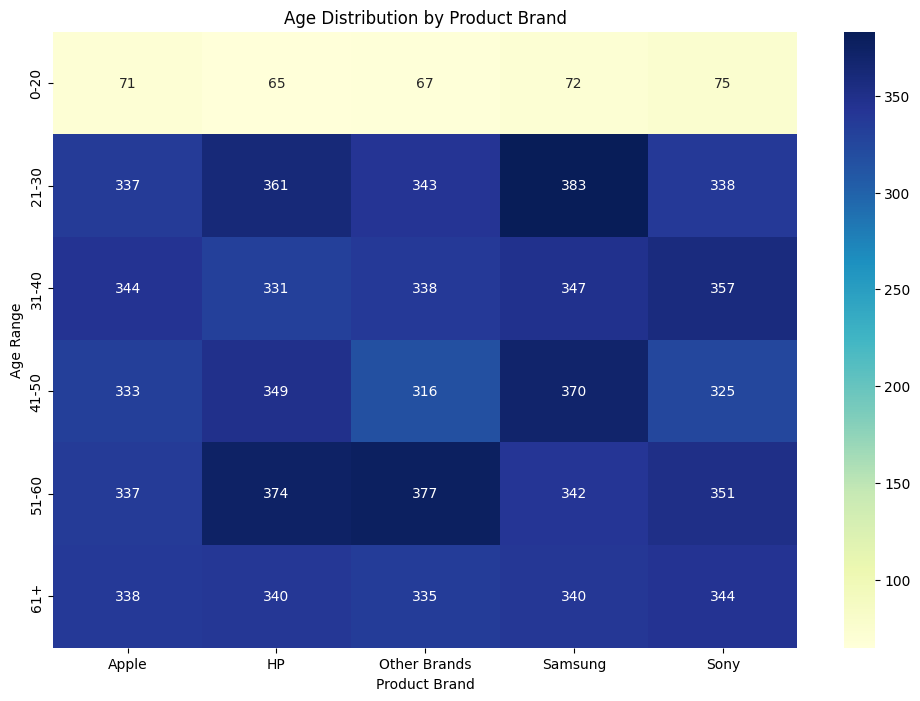

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(age_brand_crosstab, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Age Distribution by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Age Range')
plt.show()

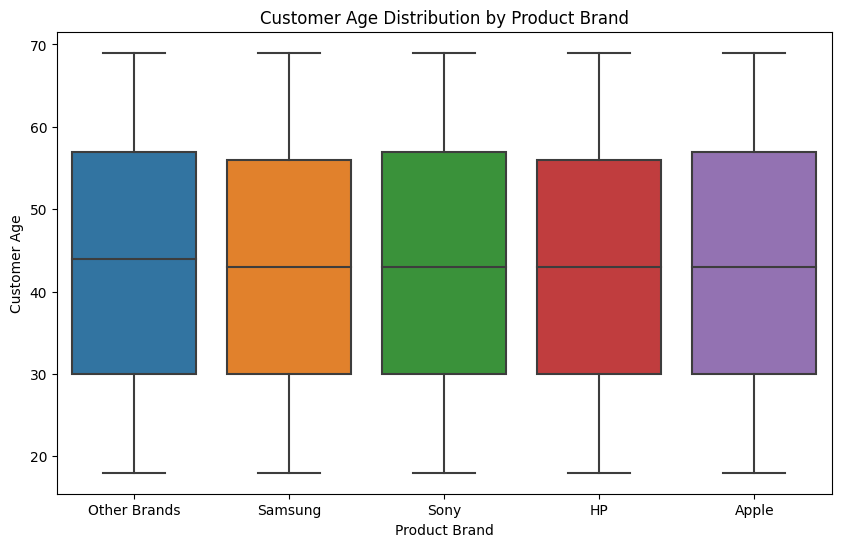

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductBrand', y='CustomerAge', data=df)
plt.title('Customer Age Distribution by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Customer Age')
plt.show()

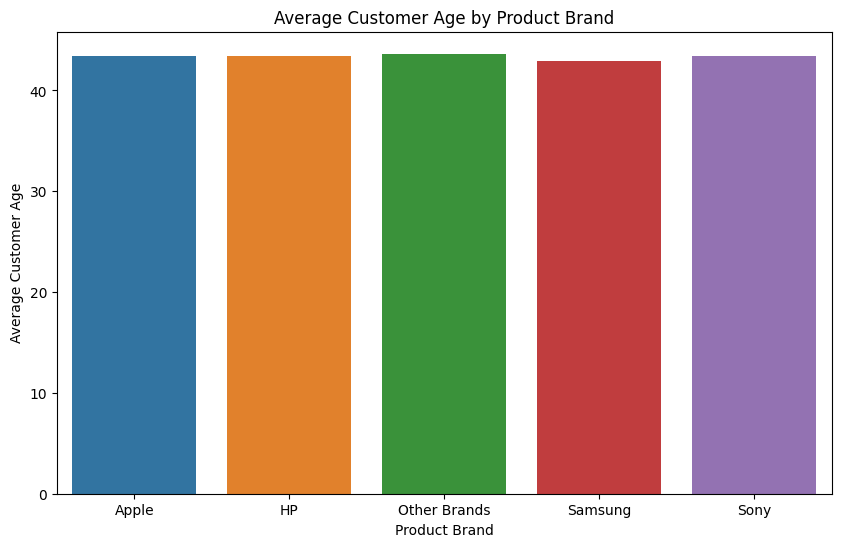

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductBrand', y='mean', data=age_stats)
plt.title('Average Customer Age by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Average Customer Age')
plt.show()

In [37]:
avg_satisfaction = df.groupby(['ProductCategory', 'ProductBrand'])['CustomerSatisfaction'].mean().reset_index()

print("Average Customer Satisfaction by Product Category and Brand:")
print(avg_satisfaction)


Average Customer Satisfaction by Product Category and Brand:
   ProductCategory  ProductBrand  CustomerSatisfaction
0       Headphones         Apple              3.104046
1       Headphones            HP              3.071839
2       Headphones  Other Brands              2.988858
3       Headphones       Samsung              2.909091
4       Headphones          Sony              2.921512
5          Laptops         Apple              3.050139
6          Laptops            HP              2.937008
7          Laptops  Other Brands              2.977961
8          Laptops       Samsung              3.074169
9          Laptops          Sony              2.931034
10   Smart Watches         Apple              3.035294
11   Smart Watches            HP              3.057534
12   Smart Watches  Other Brands              2.988764
13   Smart Watches       Samsung              2.849604
14   Smart Watches          Sony              3.083784
15     Smartphones         Apple              3.093294
16  

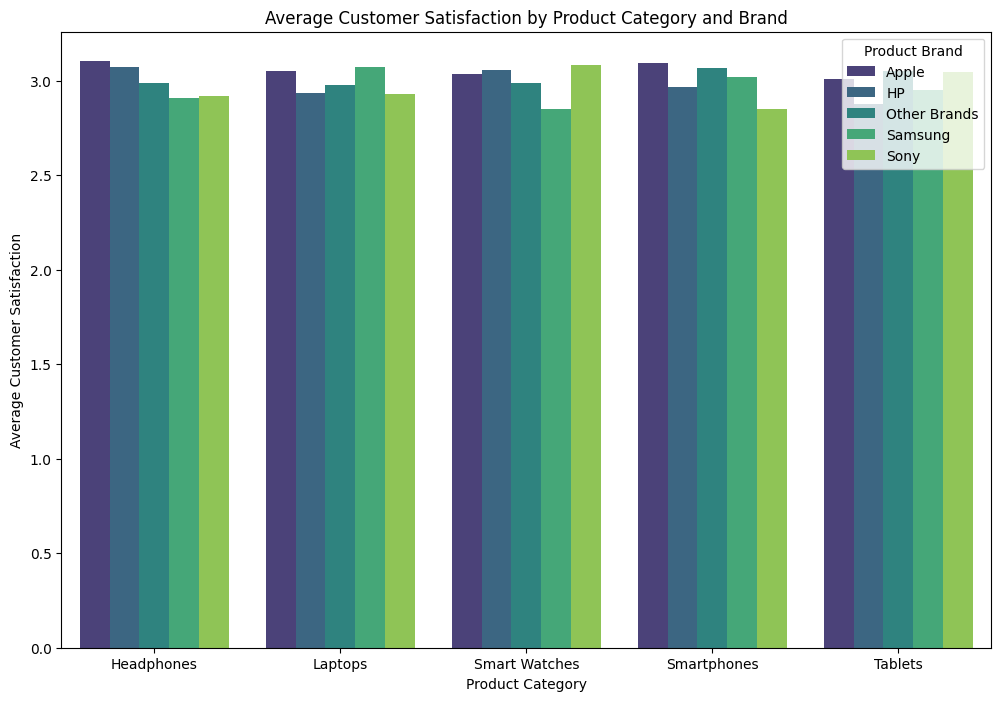

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='ProductCategory', y='CustomerSatisfaction', hue='ProductBrand', data=avg_satisfaction, palette='viridis')
plt.title('Average Customer Satisfaction by Product Category and Brand')
plt.xlabel('Product Category')
plt.ylabel('Average Customer Satisfaction')
plt.legend(title='Product Brand')
plt.show()

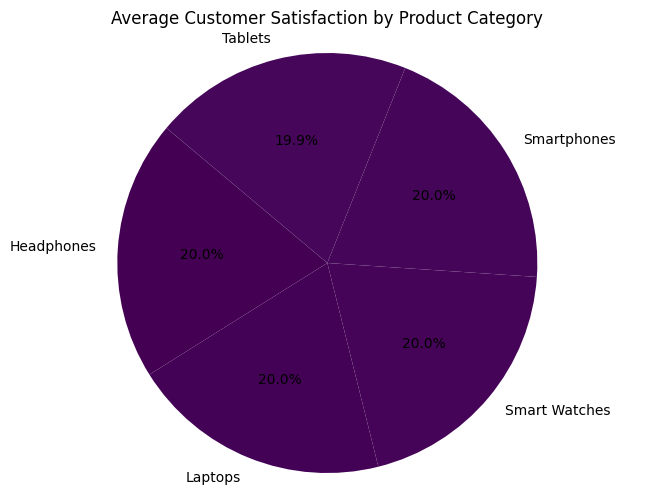

In [39]:
avg_satisfaction_by_category = df.groupby('ProductCategory')['CustomerSatisfaction'].mean()


plt.figure(figsize=(8, 6))
colors = plt.cm.viridis.colors  
plt.pie(avg_satisfaction_by_category, labels=avg_satisfaction_by_category.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Average Customer Satisfaction by Product Category')
plt.axis('equal') 
plt.show()

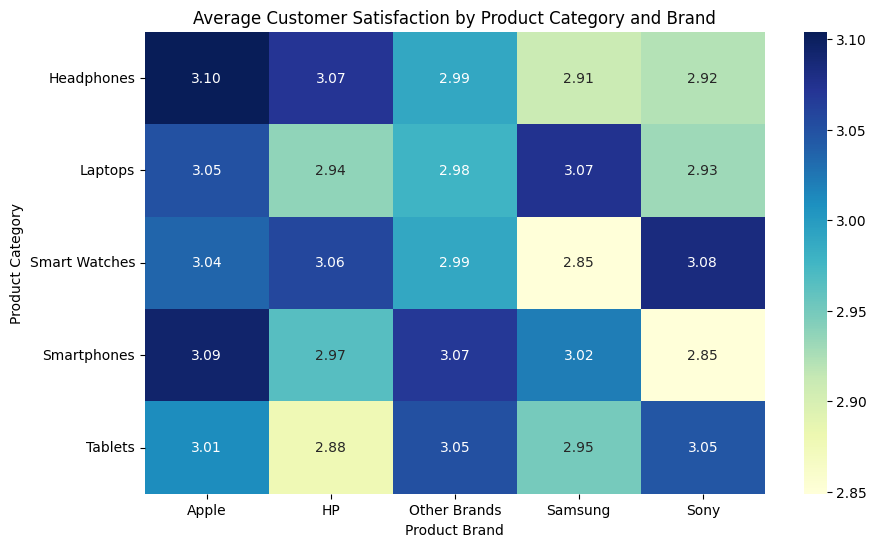

In [40]:
plt.figure(figsize=(10, 6))
pivot_table = avg_satisfaction.pivot(index='ProductCategory', columns='ProductBrand', values='CustomerSatisfaction')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Customer Satisfaction by Product Category and Brand')
plt.xlabel('Product Brand')
plt.ylabel('Product Category')
plt.show()